In [275]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder

In [276]:
wine = load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names)
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [277]:
x_data = dataset[["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", 
                  "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"]]
y_data = wine["target"]
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [278]:
def pca_own_realization(X, n_components):
    # 1. Standardize the data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # 2. Compute the covariance matrix
    cov_mat = np.cov(X_std, rowvar=False)

    # 3. Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

    # 4. Sort the eigenvalues in decreasing order and choose the top k eigenvectors
    idx = np.argsort(eigenvalues)[::-1][:n_components]
    eigenvectors = eigenvectors[:, idx]

    # 5. Project the data onto the top k eigenvectors
    X_pca = np.dot(X_std, eigenvectors)

    # 7. Calculate explained_variance
    explained_variance = eigenvalues / np.sum(eigenvalues)

    return X_pca, explained_variance

In [279]:
x_trans_data, ev = pca_own_realization(x_data, n_components=2)
x_trans_data

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,

In [280]:
print(f"Explained Variance ratio for all dims: {ev}")
print(f"Explained Variance ratio: {ev[:2]}")

Explained Variance ratio for all dims: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.00795215 0.02680749 0.01298233 0.02222153 0.01736836
 0.01930019]
Explained Variance ratio: [0.36198848 0.1920749 ]


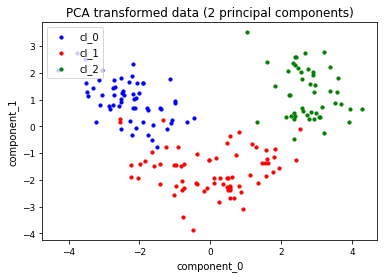

In [281]:
vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']
count_clusters = 3
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)

plt.title('PCA transformed data (2 principal components)')

pten_cluster_entries_1 = []
for cl in range(count_clusters):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(count_clusters):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()

In [361]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [362]:
wine = load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names)
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [363]:
x_data = dataset[["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", 
                  "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"]]
y_data = wine["target"]
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [364]:
sc = StandardScaler()
x_data = sc.fit_transform(x_data)

# warning DataFrame was converted to np.array
x_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [365]:
pca = PCA(n_components=2)
x_trans_data = pca.fit_transform(x_data)

print(f"Explained Variance ratio: {pca.explained_variance_ratio_}")
print(f"Explained Variance      : {pca.explained_variance_}")

Explained Variance ratio: [0.36198848 0.1920749 ]
Explained Variance      : [4.73243698 2.51108093]


In [366]:
x_names = dataset.columns.tolist()
print(x_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [367]:
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(wine.target)

In [368]:
vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']


def draw_clusters(c_clusters, pten_cluster_entries, x_label_name, y_label_name, obj_ax, plot_number):
    obj_ax.subplot(2, 3, plot_number)
    for cl_inx in range(c_clusters):
        obj_ax.scatter(pten_cluster_entries[cl_inx][0], pten_cluster_entries[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
    obj_ax.legend(loc='upper left')
    obj_ax.xlabel(x_label_name)
    obj_ax.ylabel(y_label_name)
    obj_ax.tick_params(axis='both', which='major', labelsize=9)

<ipython-input-368-8956524844c4>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  obj_ax.subplot(2, 3, plot_number)


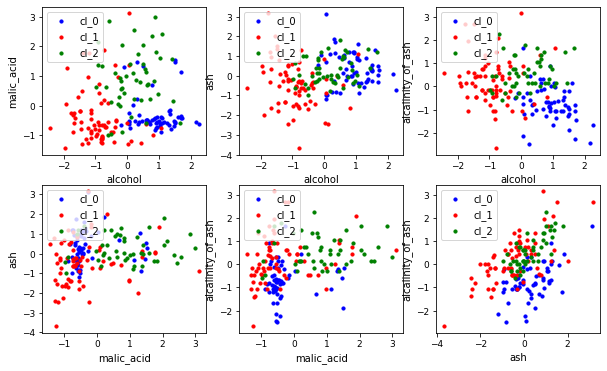

In [369]:
count_clusters = 3

mat_axis = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 2),
    (1, 3),
    (2, 3)
]

plt.figure(figsize=(10, 6))
plt.title('Original Data printing different dims')

for i in range(len(mat_axis)):
    pten_cluster_entries_1 = []
    for cl in range(count_clusters):
        pvec_cluster_entries_axis_0 = []
        pvec_cluster_entries_axis_1 = []
        for en in range(len(x_data)):
            if cl == y_data[en]:
                pvec_cluster_entries_axis_0.append(x_data[en][mat_axis[i][0]])
                pvec_cluster_entries_axis_1.append(x_data[en][mat_axis[i][1]])
        pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

    draw_clusters(count_clusters, pten_cluster_entries_1,
                  x_names[mat_axis[i][0]], x_names[mat_axis[i][1]],
                  plt, i + 1)

plt.show()

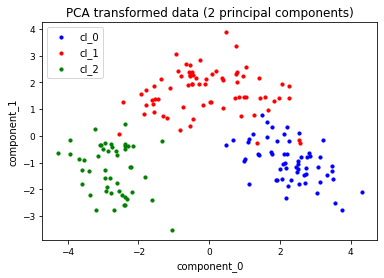

In [370]:
plt.title('PCA transformed data (2 principal components)')

pten_cluster_entries_1 = []
for cl in range(count_clusters):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(count_clusters):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()